## Import libraries and dataset

In [843]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [844]:
import seaborn as sns
import matplotlib.pyplot as plt

In [845]:
path = './output.csv'

In [846]:
data = pd.read_csv(path)

###  Shape of the data

In [847]:
data.shape

(8184, 37)

### Features

In [848]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8184 entries, 0 to 8183
Data columns (total 37 columns):
LeasedFrom                 7901 non-null object
Engines                    8183 non-null object
CrashSiteElevation         8000 non-null object
Duration                   7930 non-null object
Narrative                  8130 non-null object
FlightNumber               8172 non-null object
Crew                       8184 non-null object
Location                   8184 non-null object
InvestigatingAgency        7930 non-null object
Type                       8182 non-null object
GroundCasualities          8097 non-null object
Status                     2590 non-null object
OnBehalfOf                 7950 non-null object
TotalFatalities            8184 non-null object
TotalAirFrameHrs           8165 non-null object
Nature                     8182 non-null object
AirplaneDamage             8184 non-null object
Released                   7930 non-null object
CarrierNumber              81

In [849]:
print(len(data.columns))
data.columns

37


Index(['LeasedFrom', 'Engines', 'CrashSiteElevation', 'Duration', 'Narrative',
       'FlightNumber', 'Crew', 'Location', 'InvestigatingAgency', 'Type',
       'GroundCasualities', 'Status', 'OnBehalfOf', 'TotalFatalities',
       'TotalAirFrameHrs', 'Nature', 'AirplaneDamage', 'Released',
       'CarrierNumber', 'Phase', 'Passengers', 'OperatedBy',
       'DestinationAirport', 'OperatingFor', 'Date', 'Time', 'Cycles',
       'DownloadReport', 'DepartureAirport', 'Issued', 'Number',
       'Registration', 'Operator', 'DurationOfInvestigation', 'AirplaneFate',
       'CollisionCasualties', 'FirstFlight'],
      dtype='object')

### Examine Nulls and Data types

In [850]:
# Check the null values in the dataset
# Function to check the null counts in a dataframe
def checknullcount(df):
    info = []
    columns = ('Feature', 'Nullcount', 'Dtypes')
    for col in df.columns:
        nullcount = df[col].isnull().sum()
        datatype = df[col].dtypes
        info.append([col, nullcount, datatype])
    return (pd.DataFrame(columns=columns, data=info).sort_values('Nullcount', ascending = False))

df = (checknullcount(data))
df
# sns.set(style="darkgrid")
# ax = sns.barplot(y = 'Feature', x='Nullcount', data=df)
# plt.show()

,Feature,Nullcount,Dtypes
30,Number,8184,float64
11,Status,5594,object
33,DurationOfInvestigation,752,object
0,LeasedFrom,283,object
17,Released,254,object
29,Issued,254,object
8,InvestigatingAgency,254,object
3,Duration,254,object
27,DownloadReport,254,object
21,OperatedBy,234,object


## Check Feature Category - Aircraft and Airline Details

### LeasedFrom
- The company, organisation or individual that owns the aircraft, but did not operate it at the time of the accident. 
    - Null count - 283, datatype = object
        - Here I can assume that when the 'Leased From'value is null, the operator is using their own aircraft.
    - What do I i do?
        - Drop the column LeasedFrom

In [851]:
checkcols = ['OnBehalfOf', 'OperatedBy', 'OperatingFor', 'Operator', 'LeasedFrom']
cnt = []
null = []

for col in checkcols:
    row = []
    row.append(data[col].nunique())
    row.append(data[col].isnull().sum())
    row.append('a')
    data[col].fillna('-', inplace = True)
    null.append(row)
cols = ['Nunique','NullCount','x']
pd.DataFrame(columns=cols, data=null, index = checkcols)

,Nunique,NullCount,x
OnBehalfOf,10,234,a
OperatedBy,8,234,a
OperatingFor,183,40,a
Operator,2745,3,a
LeasedFrom,12,283,a


### OperatingFor
- The company, organisation or individual operating the aircraft at the time of the accident. This does not necessarily have to be the owner. 

In [852]:
data['OperatingFor'].value_counts()

-                                                      7908
United Express                                           11
United Nations - UN                                      10
Saudi Arabian Airlines                                    8
FedEx Express                                             8
American Eagle                                            7
Delta Connection                                          7
Royal Australian Air Force - RAAF                         6
USAir Express                                             4
US Airways Express                                        4
Manx2                                                     3
Sri Lanka Air Force                                       3
Baron Aviation                                            3
Air Force of the Democratic Republic of the Congo         3
Air Méditerranée                                          3
Qantas Empire Airways                                     3
Royal Air Force - RAF                   

### OnBehalfOf

In [853]:
data['OnBehalfOf'].value_counts()

-                                8173
U.S. Forest Service                 3
Air France                          1
HOP!                                1
Cargo North                         1
Swiss International Air Lines       1
Northwest Airlink                   1
US Airways Express                  1
US Department of State              1
Continental Express                 1
Name: OnBehalfOf, dtype: int64

### OperatedBy

In [854]:
data['OnBehalfOf'].value_counts()

-                                8173
U.S. Forest Service                 3
Air France                          1
HOP!                                1
Cargo North                         1
Swiss International Air Lines       1
Northwest Airlink                   1
US Airways Express                  1
US Department of State              1
Continental Express                 1
Name: OnBehalfOf, dtype: int64

### Operator

In [855]:
data['Operator'].value_counts()

United States Air Force - USAF                              462
-                                                           288
Royal Air Force - RAF                                       253
United States Navy                                          247
United States Army Air Force - USAAF                        221
Luftwaffe                                                    87
Air France                                                   62
Unknown                                                      49
Indian Air Force - IAF                                       47
Indian Airlines                                              46
Ejército del Aire                                            45
L'Armée de L'Air                                             42
Deutsche Lufthansa                                           40
Eastern Air Lines                                            39
Soviet Air Force                                             39
Aeroflot, Yakutsk Civil Aviation Directo

### These 4 seem the same. Let me look at them to know the difference
    - LeasedFrom has 7888 empty values, 283 null values, [10 unique values]
        - There are 13 rows with valid Leased from values. In these 3 cases Operator is not provided.
    - OnBehalfOf has 7939 empty values, 234 null values [10 unique values]
        - There are only 11 valid values. I think I am going to drop this column
        - Mostly 
    - OperatedBy has 7943 empty values, 234 null values [8 unique values]
        - When operated By is filled, Operator is not provided. I will merge Operated By and Operator
    - OperatingFor has 7868 empty values, 40 null values [183 unique values]
        - When operating for is filled, Operator is not provided. I will merge Operated For and Operator
    - Operator has only 3 null values [ 2745 unique values]
        - Most are null here. I will drop all 3 null values

In [856]:
test = data[['OnBehalfOf', 'OperatedBy', 'OperatingFor', 'Operator', 'LeasedFrom','Date']]
test['OnBehalfOf'].fillna('-',inplace = True)
                          
test[(test['OnBehalfOf'] != '-') & (test['Operator'] != '-')]
# test['OnBehalfOf'].value_counts()

/Users/roshanlulu/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,OnBehalfOf,OperatedBy,OperatingFor,Operator,LeasedFrom,Date
1527,U.S. Forest Service,-,-,Neptune Aviation Services,-,Saturday 26 June 2010
1891,U.S. Forest Service,-,-,Neptune Aviation Services,-,Sunday 3 June 2012
2238,U.S. Forest Service,-,-,Minden Air Corporation,-,Sunday 15 June 2014
4134,Air France,-,-,TAME Ecuador,-,Monday 20 April 1998


#### Operating For and Operator are never empty together. I will merge these 2 values into Operator, assuming it is the same.

In [857]:
# Merge 
operator = []
for index, op in enumerate(data['Operator']):
    if op == '-':
        op = data.ix[index, 'OperatingFor']
    else:
        pass
    operator.append(op)

data['Operator'] = operator
# After merging there are still 12 columns which dont have operator information
# 12 is a small number so I choose to remvoe these rows!
# data['Operator'] = [col.replace(' ', '_') for col in ufo.columns]
print(len(data))
data = data[data['Operator'] != '-']
len(data)


8184


8172

#### Drop the other columns - LeasedFrom,OnBehalfOf, OperatedBy

In [858]:
# Drop the columns
drop_col = ['LeasedFrom', 'OperatedBy', 'OperatingFor', 'OnBehalfOf']
data.drop(drop_col, axis = 1, inplace = True)

In [859]:
data.shape

(8172, 33)

In [860]:
# No of Unique Operators - 2857

data['Operator'].nunique()
# data['Operator'].value_counts()
# I amnot changing the operator names now. Once I get the country cleaned up, Then I can group the operators

2857

In [861]:
# There are a lot of names here. I want to categorize the airforce ones together for now
# Aim is to get something like Airforce
# Im nto grouping the other lines, since they can be used to subclassify within a coutnry classification
# Remove any text with numbers in it

data['Operator'] = ['Aeroflot' if 'Aeroflot' in t 
                    else 'Air Force' if 'Air Force' in t
#                     else 'US Air Force' if 'USAF' in t or 'USAAF' in t or 'United States Navy' in t
                else t for t in data['Operator']]
print(data['Operator'].nunique())
data['Operator'].value_counts()
 # Use regular expression to remove any text with numbers



2748


Air Force                                                   1359
Aeroflot                                                     360
United States Navy                                           247
Luftwaffe                                                     87
Air France                                                    62
Unknown                                                       49
Indian Airlines                                               48
Ejército del Aire                                             45
L'Armée de L'Air                                              42
Eastern Air Lines                                             40
Deutsche Lufthansa                                            40
American Airlines                                             38
Avianca                                                       37
Imperial Airways                                              36
Delta Air Lines                                               34
KLM Royal Dutch Airlines 

#### Plot Operator Distribution

In [862]:
data_op = data['Operator'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)
data_oph = data_op[data_op['Operator'] > 20]

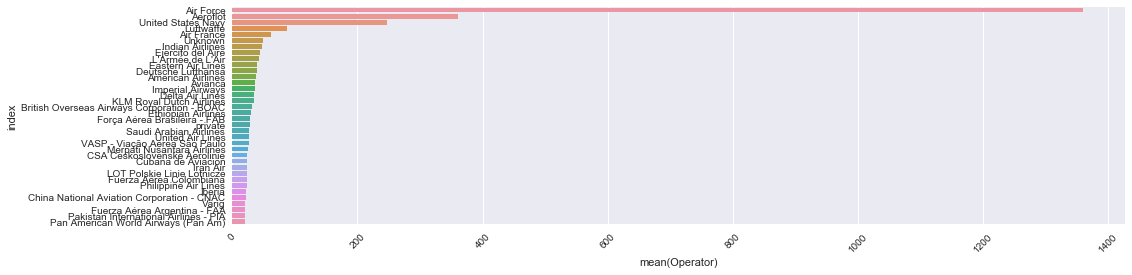

In [863]:
sns.set(style="darkgrid")
ax = sns.barplot(y = 'index', x='Operator', data=data_oph)
plt.show()

### Nature
- Nature of the flight. For passenger flights ‘domestic’  or ‘international’ is added where known. 
For a full list of flight natures used, see Appendix 3

In [864]:
data.reset_index(drop = True, inplace = True)
### Now might be a good time to check the nature of the flight. If that is categorized well
data['Nature'].nunique()
## There are 25 unique nature of flights
## Can this be cleaned further?
data['Nature'].value_counts()

Military                             2181
Domestic Scheduled Passenger         1514
Unknown                               958
Cargo                                 825
International Scheduled Passenger     548
-                                     310
Domestic Non Scheduled Passenger      308
Ferry/positioning                     283
Training                              213
Executive                             212
Int'l Non Scheduled Passenger         147
Test                                  111
Passenger                              97
Agricultural                           71
Private                                68
Scheduled Passenger                    67
Illegal Flight                         59
Ambulance                              38
Survey/research                        37
Parachuting                            34
Fire fighting                          24
Non Scheduled Passenger                20
Official state flight                  19
Demonstration                     

In [865]:
code_list = []
for row in range(0, len(data)):
    code = 0
    nature = data.ix[row, 'Nature']
    if 'Passenger' in nature:
        if 'Int' in nature:
            code = 'Passenger - Intl'
        else:
            code = 'Passenger - Domestic'
    elif 'Training' in nature or 'Test' in nature or 'Demonstration' in nature:
        code = 'Train/Test/Demo'
    elif 'Private' in nature or 'Official' in nature or 'Parachuting' in nature or 'Aerial' in nature or 'Survey' in nature:
        code = 'Private'
    elif '-' in nature or 'Unknown' in nature:
        code = 'Unknown'
    else:
        code = nature
    code_list.append(code)
data['Nature_Code'] = code_list

In [866]:
data_op = data['Nature_Code'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)

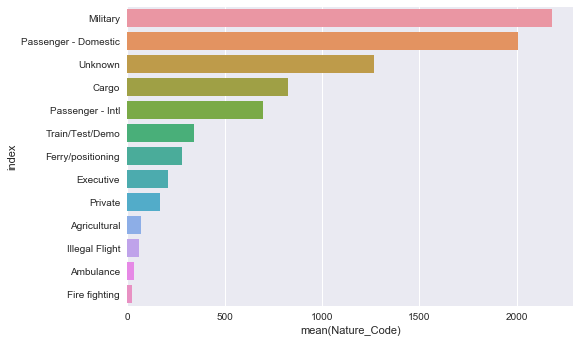

In [867]:
sns.set(style="darkgrid")
ax = sns.barplot(y = 'index', x='Nature_Code', data=data_op)
plt.show()

### Type
- Manufacturer and exact model involved in the accident. For Boeing models for instance a (first) customer code is being used. The second and third digits indicate this code. Customer code for Boeing 747-206 is '06', which is KLM. 
Where possible the name of the manufacturer is used at the time the airplane in question was built. For example, the MD-11 remains “McDonnell Douglas MD-11” and does not become Boeing MD-11 or Boeing (McDD) MD-11.



    - Ive reduced it into 27 categories of Type.
    - The ones with lesser no of incidents have been grouped together to form a category called Others

In [868]:
# import re
# # remove string with digits in it
# def cleanstring(text):
#     # split by word
#     # check if the word has a number
#     # delete word with number
#     text = re.sub("\S*\d\S*", "", text).strip()
#     t = text
#     if len(text) > 0:
#         t = text.split()
#         t = t[0]
#     return t

# data['Type'] = [cleanstring(t) for t in data['Type']]
data['Type'].value_counts()

Antonov 2R                                       122
de Havilland Canada DHC-6 Twin Otter 300         106
Douglas C-47-DL (DC-3)                           104
Junkers Ju-52/3m                                  92
Cessna 208B Grand Caravan                         80
Antonov 2                                         79
Consolidated PBY-5 Catalina                       63
Douglas DC-3                                      61
Antonov 26                                        60
Beechcraft 200 Super King Air                     55
Douglas C-47A-25-DK (DC-3)                        54
Douglas Dakota IV (DC-3)                          52
Douglas C-47 (DC-3)                               51
Douglas C-47A-90-DL (DC-3)                        49
Yakovlev 40                                       47
Consolidated PBY-5A Catalina                      45
Lisunov Li-2                                      44
Boeing 727                                        42
Antonov 24B                                   

In [869]:
# There are a lot of names here. I want to categorize it by removing the numbers first.
# Aim si to get something like Airbus, Douglas, Antonov, Boeing
# Remove any text with numbers in it

data['Type_Code'] = ['Douglas' if 'Douglas' in t 
                else 'Antonov' if 'Antonov' in t
                else 'Cessna' if 'Cessna' in t
                else 'Airbus' if 'Airbus' in t
                else 'Boeing' if 'Boeing' in t
                else 'Bombardier' if 'Bombardier' in t
                else 'Embraer' if 'Embraer' in t
                else 'Curtiss' if 'Curtiss' in t
                else 'Catalina' if 'Catalina' in t
                else 'Learjet' if 'Learjet' in t
                else 'Fairchild' if 'Fairchild' in t
                else 'Lockheed' if 'Lockheed' in t
                else 'Beechcraft' if 'Beechcraft' in t
                else 'Britten-Norman' if 'Britten-Norman' in t
                else 'Jetstream' if 'Jetstream' in t
                else 'Ford' if 'Ford' in t
                else 'Yakovlev' if 'Yakovlev' in t
                else 'de Havilland' if 'de Havilland' in t
                else 'Sabreliner' if 'Sabreliner' in t
                else 'Lisunov' if 'Lisunov' in t
                else 'Tupolev' if 'Tupolev' in t
                else 'Junkers' if 'Junkers' in t
                else 'Vickers' if 'Vickers' in t
                else 'Fokker' if 'Fokker' in t
                else 'Swearingen' if 'Swearingen' in t
                else 'Ilyushin' if 'Ilyushin' in t
                else 'Others' for t in data['Type']]
print(data['Type_Code'].nunique())
data['Type_Code'].value_counts()
 # Use regular expression to remove any text with numbers


27


Douglas           1859
Others            1441
Antonov            635
Boeing             613
Lockheed           502
de Havilland       356
Curtiss            268
Cessna             268
Beechcraft         232
Junkers            228
Britten-Norman     183
Vickers            171
Fokker             152
Catalina           151
Ilyushin           145
Fairchild          139
Airbus             135
Learjet            127
Tupolev             99
Ford                98
Swearingen          81
Embraer             78
Lisunov             72
Yakovlev            57
Sabreliner          41
Jetstream           26
Bombardier          15
Name: Type_Code, dtype: int64

In [870]:
data_op = data['Type_Code'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)

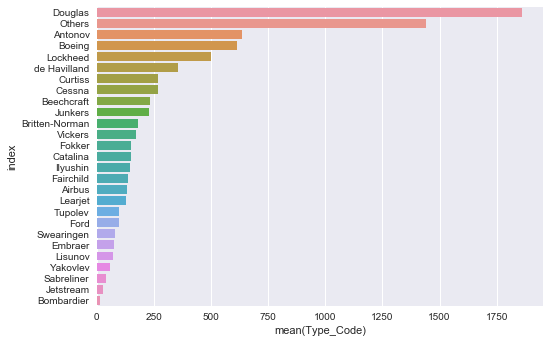

In [871]:
sns.set(style="darkgrid")
ax = sns.barplot(y = 'index', x='Type_Code', data=data_op)
plt.show()

In [872]:
## Id like to plot the Aircraft distributions wrt timelines
## See the dictibution of aircraft type to airline operator

In [873]:
# import re


# s = "ABCD abcd AB55 55CD A55D 5555"
# re.sub("\S*\d\S*", "", s).strip()

### FlightNumber : Unique ID
- Flightnumber as assigned to the flight by the operator. They ar esupposed ot be unique values
- I am going to randomly assign unique values to it. I wont be retaining the original numbers. It will not make a difference to my data

In [874]:
# data[['CarrierNumber', 'FlightNumber']]
unique_id = [t for t in range(0, len(data))]
data['FlightNumber'] = unique_id

###  CarrierNumber  - Verdict: Drop it!

In [875]:
# I dont think carrier number is a useful feature.
# Im going to drop the column
data.drop('CarrierNumber', axis = 1, inplace = True)

### FirstFlight

In [876]:
data['FirstFlight'].isnull().sum()
# No null values
data['FirstFlight'].value_counts()

# There are 2011 rows that have empty data
# Cleaning required
# sme have only year
# Some have the date of first flight and the age of the flight at that time
# Check the date of incident and check what we need for this field. 
# - Age mightbe a good field to get from here and the dat field

                                       2011
 1944                                   662
 1943                                   339
 1945                                   331
 1942                                   155
 1968                                   122
 1966                                   103
 1967                                    99
 1981                                    96
 1980                                    93
 1969                                    92
 1977                                    87
 1976                                    85
 1975                                    81
 1958                                    80
 1957                                    79
 1978                                    78
 1959                                    76
 1973                                    75
 1979                                    73
 1972                                    71
 1956                                    70
 1970                           

In [877]:
# Extract the first 4 digits from this category. It represents the y

def clean_year(year):
    if year == ' ':
        year = 0
    elif type(year) == str:
        year = year[1:5]
    else:
        pass
    return int(year)
    
data['FirstFlight'] = [clean_year(year) for year in data['FirstFlight']]
data['FirstFlight'].value_counts()

0       2011
1944     662
1943     339
1945     331
1942     155
1968     152
1969     131
1975     123
1967     123
1981     123
1966     119
1958     118
1980     115
1976     110
1977     107
1970     102
1974      97
1979      96
1978      95
1959      91
1957      90
1973      88
1990      83
1971      82
1965      80
1988      79
1985      79
1982      76
1972      74
1989      73
1956      73
1986      73
1960      71
1983      68
1991      66
1962      66
1987      65
1952      60
1964      60
1961      59
1992      58
1984      57
1946      53
1963      52
1954      50
1947      50
1993      50
1937      50
1953      47
1929      43
1941      43
1955      40
1997      40
1948      39
1949      38
1996      37
1940      37
1994      36
1995      36
1928      35
1950      35
2001      35
1938      33
1934      32
2000      30
1936      29
2005      29
1999      29
1935      27
1951      24
1939      23
1998      22
2002      21
2010      20
2007      20
2006      18
2009      17

In [878]:
data_op = data['FirstFlight'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)
data_op = data_op.sort_values('index')

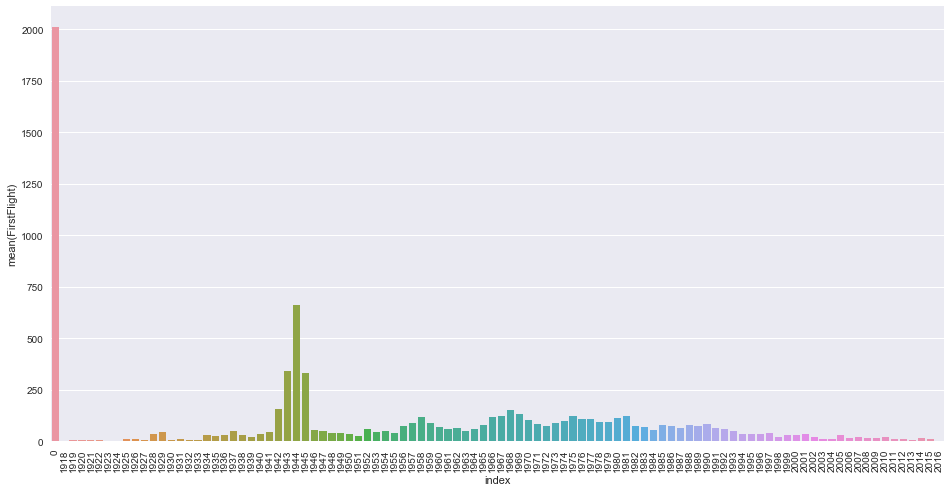

In [879]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90)
ax = sns.barplot(x = 'index', y='FirstFlight', data=data_op)
plt.show()

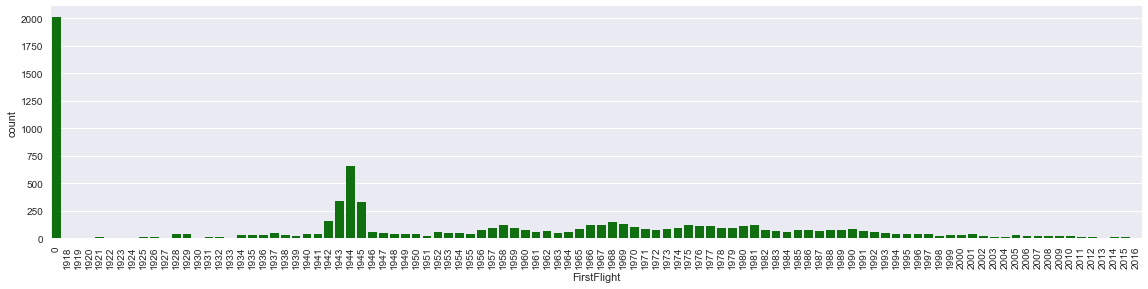

In [880]:
plt.figure(figsize=(16, 4))
ax = sns.factorplot("FirstFlight", data=data, size = 4, aspect = 4, kind="count", color="g")
ax.set_xticklabels(rotation=90)
plt.show()

### Registration
- The registrationmark applied on the  the aircaft at the time of the accident. Airplanes involved in some occurrences carried illegal/unofficial registration marks. In these cases the unofficial registration is given.

- The registration numbers are unqiue mostly. This is not an field I will be using fo rmy study. I will drop it.

In [881]:
data['Registration'].isnull().sum()
# No null values
data['Registration'].value_counts().head()
# Drop it
data.drop('Registration', axis = 1, inplace = True)

### 31. Number
- Manufacturer serial number/construction number. Some manufacturers like Boeing and McDonnell Douglas include the line number, preceded by a /. Thus a Boeing 767, c/n 24542/28 means it has construction number 24542, and that it is the 28th B767 off the production line. Construction numbers for each manufacturer are usually unique.

In [882]:
data['Number'].isnull().sum()
# There are 8172 null values i.e this field does not have any valid values
# Drop it
data.drop('Number', axis = 1, inplace = True)

### 2.Engines
- Number and type (model and mark) of engines.


In [883]:
data['Engines'].isnull().sum()
# 1 null value only
data['Engines'].value_counts()
data['Engines'].dropna(inplace = True, axis = 0)
data.reset_index(drop=True, inplace = True)

In [884]:
# There are a lot of names here. I want to categorize it by removing the numbers first.
# Remove any text with numbers in it

data['Engine_Type'] = [t if type(t) == float
                else 'Pratt & Whitney' if 'Pratt & Whitney' in t 
                else 'Ivchenko' if 'Ivchenko' in t
                else 'Garrett' if 'Garrett' in t
                else 'Lycoming' if 'Lycoming' in t
                else 'Bristol' if 'Bristol' in t
                else 'Rolls-Royce' if 'Rolls-Royce' in t
                else 'Shvetsov' if 'Shvetsov' in t
                else 'Allison' if 'Allison' in t
                else 'Wright' if 'Wright' in t
                else 'Soloviev' if 'Soloviev' in t
                else 'General Electric' if 'General Electric' in t      
                else 'CFMI' if 'CFMI' in t
                else 'Glushenkov' if 'Glushenkov' in t
                else 'Kuznetsov' if 'Kuznetsov' in t
                else 'Walter' if 'Walter' in t
                else 'IAE' if 'IAE' in t
                else 'Williams Intl' if 'Williams' in t
                else 'Turbomeca' if 'Turbomeca' in t       
                else 'Honeywell' if 'Honeywell' in t
                else 'Gnome-Rhône' if 'Gnome-Rhône' in t
                else 'Renault' if 'Renault' in t
                else 'Mikulin' if 'Mikulin' in t
                else 'Lotarev' if 'Lotarev' in t
                else 'Daimler' if 'Daimler' in t
                else 'BMW' if 'BMW' in t
                else 'de Havilland' if 'de Havilland' in t
                else 'Armstrong' if 'Armstrong' in t
                else 'Alvis Leonides' if 'Alvis Leonides' in t
                else 'Liberty' if 'Liberty' in t
                else 'Unknown' if t == '-'
                else 'Others' for t in data['Engines']]

data['Engine_count'] = [-1 if t == '-'
                        else t if type(t) == float
                        else int(t[1:2]) if t[1:2] != ' ' 
                        else 2 for t in data['Engines']]

In [885]:
data_op = data['Engine_count'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)
data_op = data_op.sort_values('index')

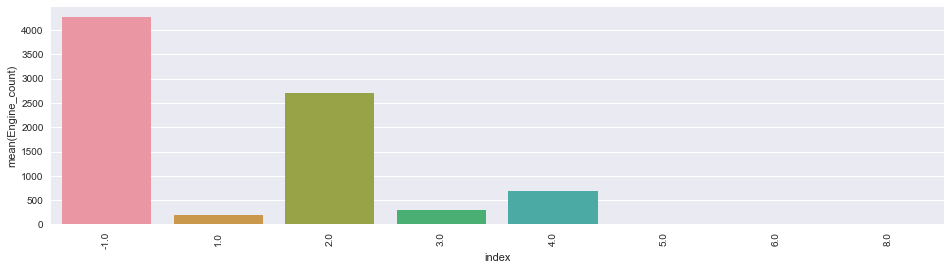

In [886]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)
ax = sns.barplot(x = 'index', y='Engine_count', data=data_op)
plt.show()

In [887]:
data_op = data['Engine_Type'].value_counts()
data_op = pd.DataFrame(data = data_op)
data_op.reset_index(inplace = True)
data_op = data_op.sort_values('index')

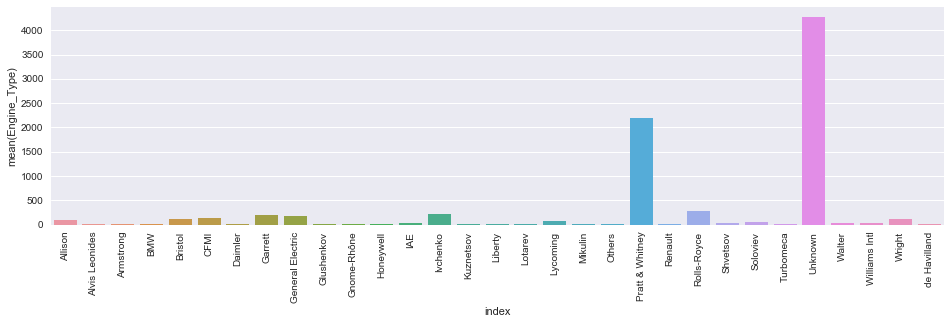

In [888]:
sns.set(style="darkgrid")
plt.figure(figsize=(16, 4))
plt.xticks(rotation=90)
ax = sns.barplot(x = 'index', y='Engine_Type', data=data_op)
plt.show()

## Feature Category Fatalities

### Crew Fatalities
- Exact number of flight- and cabincrew members aboard the aircraft at the time of departure, and number of passengers fatally injured as a direct result of the accident. An injury is classified as fatal if death results from the injury within 30 days from the date of the accident (ICAO) Deadheading crewmembers are judged 'passengers'.


In [889]:
data['Crew'].isnull().sum()
data['Crew'].value_counts().head()

Fatalities:  / Occupants:       1359
Fatalities: 0 / Occupants:      1106
Fatalities: 0 / Occupants: 2     744
Fatalities: 2 / Occupants: 2     552
Fatalities: 3 / Occupants: 3     449
Name: Crew, dtype: int64

In [890]:
# Clean Crew
crew = []
def clean_fatal(text):
    string = ''
    for t in text:
        if t.isdigit() or t == '/':
            string += t
        else:
            pass
    return string

crew = [clean_fatal(t) for t in data['Crew']]
data['Crew_Fatal'] = [0 if (t.split('/')[0]) == ''
                      else int(t.split('/')[0])
                      for t in crew]
data['Crew_Occ'] = [0 if (t.split('/')[1]) == ''
                    else int(t.split('/')[1])
                    for t in crew]
data.drop('Crew', axis = 1, inplace = True)

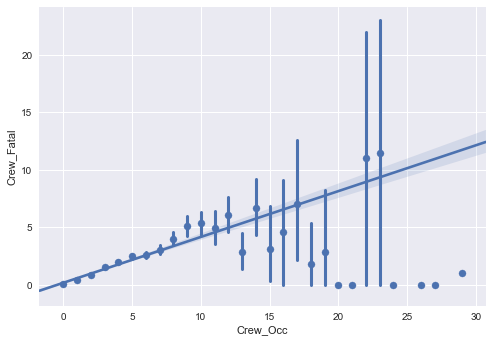

In [891]:
x = sns.regplot(x="Crew_Occ", y="Crew_Fatal", data=data, x_estimator=np.mean)
plt.show()

### TotalFatalities

In [892]:
data['TotalFatalities'].isnull().sum()
data['TotalFatalities'].value_counts().head()

Fatalities:  / Occupants:        983
Fatalities: 0 / Occupants:       810
Fatalities: 0 / Occupants: 2     366
Fatalities: 0 / Occupants: 0     357
Fatalities: 2 / Occupants: 2     298
Name: TotalFatalities, dtype: int64

In [893]:
# Clean Crew
all_fatal = [clean_fatal(t) for t in data['TotalFatalities']]
data['Total_Fatal'] = [0 if (t.split('/')[0]) == ''
                      else int(t.split('/')[0])
                      for t in all_fatal]
data['Total_Occ'] = [0 if (t.split('/')[1]) == ''
                    else int(t.split('/')[1])
                    for t in all_fatal]
data.drop('TotalFatalities', axis = 1, inplace = True)

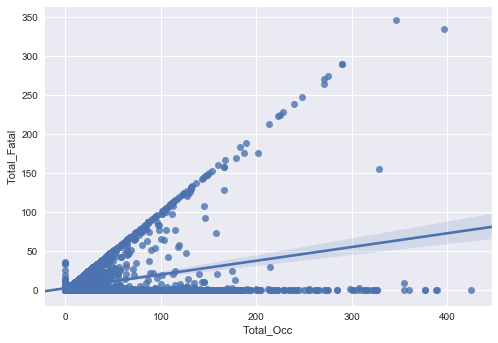

In [894]:
x = sns.regplot(x="Total_Occ", y="Total_Fatal", data=data)
plt.show()

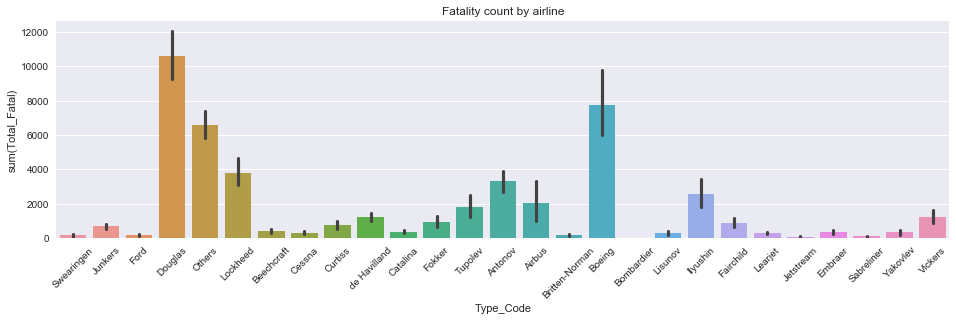

In [895]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 4))

plt.xticks(rotation = 45)

sns.barplot(x="Type_Code", y="Total_Fatal", data=data, estimator = np.sum)
plt.title('Fatality count by airline')

plt.show()

### 21. Passengers
- Number of passengers aboard the aircraft at the time of departure, and number of passengers fatally injured as a direct result of the accident. 
An injury is classified as fatal if death results from the injury within 30 days from the date of the accident (ICAO)
Total:	Number of occupants (crew + passengers) aboard the aircraft at the time of the accident, and number of occupants fatally injured as a direct result of the accident. An injury is classified as fatal if death results from the injury within 30 days from the date of the accident (ICAO).


In [896]:
data['Passengers'].isnull().sum()
data['Passengers'].value_counts().head()

Fatalities: 0 / Occupants: 0    2346
Fatalities:  / Occupants:       1363
Fatalities: 0 / Occupants:      1085
Fatalities: 0 / Occupants: 1     139
Fatalities: 1 / Occupants: 1     120
Name: Passengers, dtype: int64

In [897]:
# Clean Crew
all_fatal = [clean_fatal(t) for t in data['Passengers']]
data['Psngr_Fatal'] = [0 if (t.split('/')[0]) == ''
                      else int(t.split('/')[0])
                      for t in all_fatal]
data['Psngr_Occ'] = [0 if (t.split('/')[1]) == ''
                    else int(t.split('/')[1])
                    for t in all_fatal]
data.drop('Passengers', axis = 1, inplace = True)

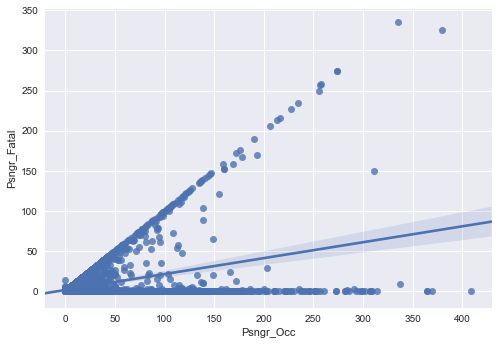

In [898]:
x = sns.regplot(x="Psngr_Occ", y="Psngr_Fatal", data=data)
plt.show()

### 11. GroundCasualities
- Number of fatalities on the ground as a direct result of the occurrence. Ground casualties exclude fatalities as a result of an airplane collision on the ground.
See also: Collision casualties


In [899]:
data['GroundCasualities'].isnull().sum()
data['GroundCasualities'].fillna('-', inplace = True)
data['GroundCasualities'].value_counts()

-                  8027
Fatalities: 1        60
Fatalities: 2        25
Fatalities: 3        12
Fatalities: 4         6
Fatalities: 7         5
Fatalities: 6         5
Fatalities: 5         5
Fatalities: 9         3
Fatalities: 37        2
Fatalities: 13        2
Fatalities: 237       2
Fatalities: 8         2
Fatalities: 12        2
Fatalities: 22        2
Fatalities: 17        1
Fatalities: 23        1
Fatalities: 24        1
Fatalities: 44        1
Fatalities: 32        1
Fatalities: 20        1
Fatalities: 78        1
Fatalities: 87        1
Fatalities: 71        1
Fatalities: 35        1
Fatalities: 11        1
Fatalities: 14        1
Name: GroundCasualities, dtype: int64

In [900]:
# Clean Crew
data['GndFatal'] = [0 if t == '-'
             else int(clean_fatal(t)) for t in data['GroundCasualities']]
data['GndFatal']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      0
87      1
88      0
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [901]:
data.drop('GroundCasualities', axis = 1, inplace = True)

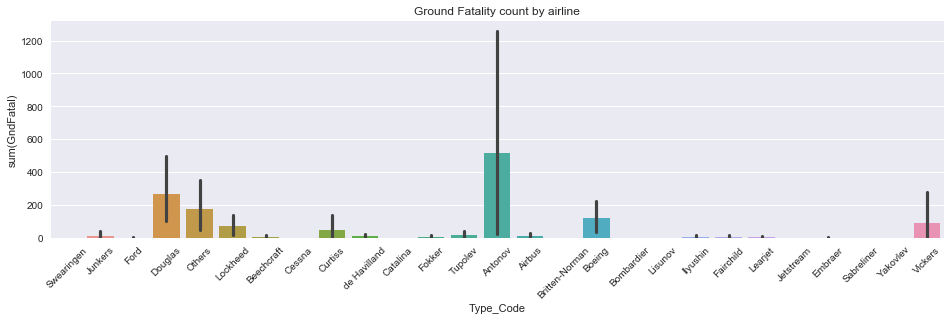

In [902]:
sns.set(style="darkgrid")

plt.figure(figsize=(16, 4))

plt.xticks(rotation = 45)

sns.barplot(x="Type_Code", y="GndFatal", data=data, estimator = np.sum)
plt.title('Ground Fatality count by airline')

plt.show()

### 36. CollisionCasualties
- Number of fatalities aboard other aircraft involved in collision accidents.

In [903]:
data['CollisionCasualties'].isnull().sum()
data['CollisionCasualties'].fillna('-', inplace = True)
data['CollisionCasualties'].value_counts()

-                  8059
Fatalities: 1        25
Fatalities: 2        24
Fatalities: 5         9
Fatalities: 3         9
Fatalities: 4         8
Fatalities: 6         5
Fatalities: 7         4
Fatalities: 9         3
Fatalities: 13        2
Fatalities: 14        2
Fatalities: 11        2
Fatalities: 17        2
Fatalities: 15        2
Fatalities: 18        1
Fatalities: 34        1
Fatalities: 248       1
Fatalities: 70        1
Fatalities: 10        1
Fatalities: 36        1
Fatalities: 20        1
Fatalities: 68        1
Fatalities: 26        1
Fatalities: 41        1
Fatalities: 58        1
Fatalities: 8         1
Fatalities: 22        1
Fatalities: 79        1
Fatalities: 335       1
Fatalities: 12        1
Name: CollisionCasualties, dtype: int64

In [904]:
# Clean Crew
data['Coll_Fatal'] = [0 if t == '-'
             else int(clean_fatal(t)) for t in data['CollisionCasualties']]

data.drop('CollisionCasualties', axis = 1, inplace = True)

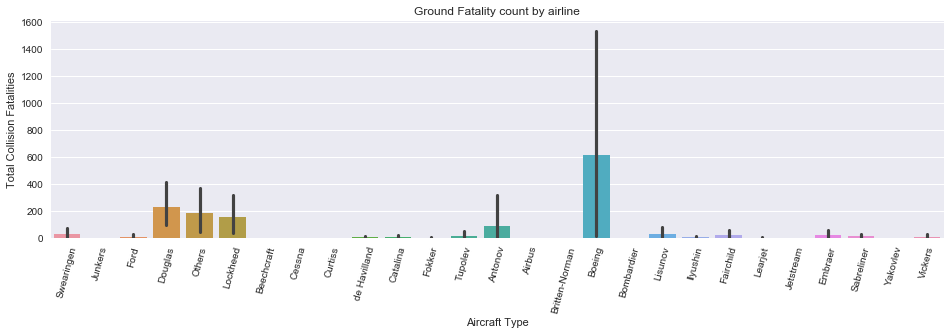

In [938]:
sns.set(style="darkgrid")

plt.figure(figsize= (16,4))

plt.xticks(rotation = 75)

ax = sns.barplot(y="Coll_Fatal", x="Type_Code", data=data, estimator = np.sum)

plt.title('Ground Fatality count by airline')
plt.xlabel('Aircraft Type')
plt.ylabel('Total Collision Fatalities')

plt.show()

## Feature Category Crash Details

### 3. CrashSiteElevation

### 20. Phase
- Phase of flight. The flight phases are in accordance with the broad phases defined by the CAST/ICAO Common Taxonomy Team (CICTT), as laid down in the Phase of Flight Definitions document (October, 2002)

### 4. Duration - Same as Total airframe hours?

### 5. Narrative
- Description of the occurrence.


### 25. Date
- Date of occurrence (local time), format DD MMM YYYY. DD or MMM becomes XX or XXX if the exact day or month of an occurrence is unknown.

### 29. DepartureAirport
- Last airport of departure before the accident (between brackets if known the IATA airport code).

### 23. DestinationAirport
- Scheduled destination airport. In case of diversions, the intended destination airport is given (between brackets if known the IATA airport code).


### 17. AirplaneDamage
- Describes the amount of damage to the airplane as a result of the occurrence. Possible values are: Written off (See also: Definitions), Substantial, Minor, None, and Unknown.


### 26. Time
- Time of the accident – local time.

### 35. AirplaneFate
- Describes the amount of damage to the airplane as a result of the occurrence. Possible values are: Written off (See also: Definitions), Substantial, Minor, None, and Unknown.


### 15. TotalAirFrameHrs - What is this?
- Total airframe hours at the time of the accident.

### 27. Cycles - What category to put this ?
- Total number of take-offs and landings at the time of the accident.


### 8. Location
- Location of the incident

## Feature Category - Investigation results

### 28. DownloadReport - What is this?

### 30. Issued -When was report issued?

### 18. Released

### 12. Status
- Status of the information. Final means that the official final investigation report was used to compile the accident description. Preliminary- Official means that the official preliminary investigation report was used and Preliminary means press information and other unofficial information was used.


### 34. DurationOfInvestigation

### 9. InvestigatingAgency

In [ ]:
data['Date'] = [d.split()[-1] for d in data['Date']]

In [ ]:
data = data[data['Date'] != 'unk']

In [ ]:
data = data[data['Date'] != 'unk.']

In [ ]:
data = data[data['Date'] != '195.']

In [ ]:
data = data[data['Date'] != '197x']

In [ ]:
import re

In [ ]:
test  = 'ABs9'
print(re.match("[0-9]", test))

In [ ]:
import re

data['Date'] = [0 if (re.match("[0-9]", d)) == None else int(d) for d in data['Date']]

In [ ]:
# data = data[data['Date'] > 1980]

In [ ]:
data.shape

In [ ]:
checknullcount(data)

In [ ]:
data['Nature'].value_counts()